In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



data = pd.read_csv(r"C:\Users\GIR\Downloads\mostafa.csv")



In [29]:
# the first 10 rows of the data
print(data.head())

# summary information about the data including data types and non-null values
print(data.info())


# the column names of the data
print(data.columns)

# descripe statistics of the data
print(data.describe(), "\n")

      ID Marital Status Gender    Income  Children        Education  \
0  12496              M      F   $40,000         1        Bachelors   
1  24107              M      M   $30,000         3  Partial College   
2  14177        married   Male   $80,000         5  Partial College   
3  24381              S   Male   $70,000         0        Bachelors   
4  25597              S      M        NaN        0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region  Age  \
0  Skilled Manual        Yes     0        0-1 Miles   Europe   42   
1        Clerical        Yes     1        0-1 Miles   Europe   43   
2    Professional         No     2        2-5 Miles   Europe   60   
3    Professional        Yes     1       5-10 Miles  Pacific   41   
4        Clerical         No     0        0-1 Miles   Europe   36   

  Purchased Bike  
0              N  
1             No  
2             No  
3              Y  
4            Yes  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [30]:
# Function to fix 'Marital Status' column values

def fix_Marital(a):
    if(a=="M" or a=="m" or a=="married" or a=="Married"):
        return "married"
    else:
        return "single"
data["Marital Status"]=data["Marital Status"].apply(fix_Marital)

data[' Income '] = data[' Income '].str.replace('$', '', regex=False).str.replace(',', '', regex=False)


# convert income data type to numeric 
data[' Income '] = pd.to_numeric(data[' Income '], errors='coerce')



In [31]:
# information about the dataframe before transformation
print(data.info())

# Function to standardize 'Children' column values
def fix_Children(a):

    if (a=="one"  or a=="1"):
        return "1"
    elif (a=="zero"  or a=="0"):
        return "0"
    elif (a=="two"  or a=="2"):
        return "2"
    elif (a=="three"  or a=="3"):
        return "3"
    elif (a=="four"  or a=="4"):
        return "4"
    elif (a=="five"  or a=="5"):
        return "5"
    elif (a=="six"  or a=="6"):
        return "6"
    else:
        return "0"
    
data['Children' ] = data['Children'].apply(fix_Children).astype(int)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1026 non-null   int64  
 1   Marital Status    1026 non-null   object 
 2   Gender            1026 non-null   object 
 3    Income           1020 non-null   float64
 4   Children          1026 non-null   object 
 5   Education         1017 non-null   object 
 6   Occupation        1024 non-null   object 
 7   Home Owner        1026 non-null   object 
 8   Cars              1026 non-null   int64  
 9   Commute Distance  1026 non-null   object 
 10  Region            1024 non-null   object 
 11  Age               1026 non-null   int64  
 12  Purchased Bike    1026 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 104.3+ KB
None


In [32]:

# Function to standardize 'Purchased Bike' column values
def fix_PurchasedBike(a):
    a_lower = a.lower().strip()  # Convert to lowercase and strip whitespace
    if a_lower in ["y", "yes"]:
        return 1
    else:
        return 0

    
data['Purchased Bike']=data['Purchased Bike'].apply(fix_PurchasedBike)





In [33]:

# Function to standardize 'Home Owner' column values
def fix_home_owner(a):
    a_lower = a.lower().strip()  # Convert to lowercase and strip whitespace
    if a_lower in ["y", "yes"]:
        return 1
    else:
        return 0

# Applying the fix_home_owner function to 'Home Owner' column and converting to integer
data['Home Owner'] = data['Home Owner'].apply(fix_home_owner).astype(int)

# Function to standardize 'Gender' column values
def fix_gender(a):
    a_lower = a.lower().strip()  # Convert to lowercase and strip whitespace
    if a_lower in ["m", "male"]:
        return "male"
    else:
        return "female"

# Applying the fix_gender function to 'Gender' column
data['Gender'] = data['Gender'].apply(fix_gender)


In [53]:
# Filling missing values with the mode (most common value) of each column
data = data.fillna(data.mode().iloc[0])

# Counting the number of duplicated rows in the dataframe
print("Number of duplicated data:", data.duplicated().sum(), "\n")



Number of duplicated data: 0 



In [35]:


# Removing duplicated rows from the dataframe
data = data.drop_duplicates()

#  information about the dataframe after removing duplicates
print(data.info())




<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1005 non-null   int64  
 1   Marital Status    1005 non-null   object 
 2   Gender            1005 non-null   object 
 3    Income           1005 non-null   float64
 4   Children          1005 non-null   int32  
 5   Education         1005 non-null   object 
 6   Occupation        1005 non-null   object 
 7   Home Owner        1005 non-null   int32  
 8   Cars              1005 non-null   int64  
 9   Commute Distance  1005 non-null   object 
 10  Region            1005 non-null   object 
 11  Age               1005 non-null   int64  
 12  Purchased Bike    1005 non-null   int64  
dtypes: float64(1), int32(2), int64(4), object(6)
memory usage: 102.1+ KB
None


In [36]:

# 1. What is the average income of the employees  in this dataset?
avg_income = data[' Income '].mean()
print("Average income: ",avg_income)


# 2. Which percentage of employees earn more than $50,000 ?
percentage=(data[' Income '] > 50000).sum() 


print("percentage of employees earn more than $50,000: ",percentage/len(data) *100,"% \n")




# 3. Which percentage of employees have purchased a bike?
percentage=(data['Purchased Bike']==1).sum() / len(data) * 100
print("percentage of employees have purchased a bike: ",percentage,"% \n")


Average income:  56218.90547263682
percentage of employees earn more than $50,000:  52.537313432835816 % 

percentage of employees have purchased a bike:  48.159203980099505 % 



In [37]:

# 4. What is the most common occupation in this dataset?
common_occupation = data['Occupation'].mode()
print("Most common occupation: ",common_occupation,"\n")



# 5. How many employees in this dataset have no children?
num_no_children = (data['Children'] == 0).sum()
print("Number of  with no children:",num_no_children,"\n")



# 6. What is the average number of cars owned by employeesls in this dataset?
avg_num_cars = data['Cars'].mean()
print("Average number of cars: ",avg_num_cars,"\n")


Most common occupation:  0    Professional
Name: Occupation, dtype: object 

Number of  with no children: 282 

Average number of cars:  1.4398009950248756 



In [38]:

# 7. How many employees in this dataset live in the Pacific region?
num_pacific_region = (data['Region'] == 'Pacific').sum()
print("Number of employees live in  Pacific region: ",num_pacific_region,"\n")


# 8. What is the average age  in this dataset?
print("the average age :",data['Age'].mean(),"\n")


a=0

    
for i,n in zip(data["Home Owner"] , data["Commute Distance"]):
    if (n == '5-10 Miles') and (i == 1):
        a+=1

#9. what is the percentage in this dataset who have a commute distance of 5-10 miles and own a home?
print("the percentage in this dataset who have a commute distance of 5-10 miles and own a home: ",a/len(data["Home Owner"])*100,"%\n")


Number of employees live in  Pacific region:  193 

the average age : 44.14029850746269 

the percentage in this dataset who have a commute distance of 5-10 miles and own a home:  15.522388059701491 %



In [39]:

#10. What is the most common commute distance in this dataset?
print("the most common commute distance",data["Commute Distance"].mode().iloc[0],"\n") 


# 11. What is the most common gender in this dataset?

print("the most common commute gender:",data["Gender"].mode().iloc[0],"\n")

#12.what is the average income of male employees
male_income_mean = data[data['Gender']=='male'][' Income '].mean()
print("the average income of male individuals:",male_income_mean,"\n")


the most common commute distance 0-1 Miles 

the most common commute gender: male 

the average income of male individuals: 57957.198443579764 



In [40]:

#13.what is the average income of female employees
female_income_mean = data[data['Gender']=='female'][' Income '].mean()
print("the average income of female individuals:",female_income_mean,"\n")


#14. What is the percentage of male employees in this dataset?
percentage_male = (data['Gender'] =="male").sum() / len(data) * 100
print("the percentage of male :",percentage_male,"% \n")


#15.What is the percentage of female employees in this dataset?
print("the percentage of female :",100-percentage_male,"% \n")

the average income of female individuals: 54399.18533604888 

the percentage of male : 51.14427860696517 % 

the percentage of female : 48.85572139303483 % 



In [41]:

#16.How many employee in this dataset have 2 or more cars and income <50000?
print("employee in this dataset have 2 or more cars and income <50000: ",((data['Cars'] >= 2) & (data[' Income '] < 50000)).sum(),"employee\n")

#17.What is the percentage of indiviuals in this dataset who are home owners and have purchased a bike?
percentage=(((data["Home Owner"]==1)& (data["Purchased Bike"]==1)).sum())/len(data) *100
print("percentage of individuals in this dataset who are home owners and have purchased a bike : ",percentage,"%\n")

#18.What is the highest income in this dataset?
print("highest income: ",data[" Income "].max(),"\n")


#19.How many employee in this dataset have a partial college education?

print("partial college education: ",(data['Education']=="Partial College").sum(),"employee \n")

employee in this dataset have 2 or more cars and income <50000:  177 employee

percentage of individuals in this dataset who are home owners and have purchased a bike :  32.43781094527363 %

highest income:  170000.0 

partial college education:  264 employee 



In [42]:
#20.How many employee in this dataset are over 50 years old?
employe=(data["Age"]>50).sum()
print("employee in this dataset are over 50 years old : ",employe," employee\n")
#21.What is the percentage of male employees in over 50 years old?
employe=((data["Age"]>50) & (data["Gender"]==1)).sum()
print(" number of male employees in over 50 years old: ",employe,"employee \n")

#22.How many employee in this dataset have a skilled manual occupation?
employe=(data["Occupation"]=="Skilled Manual").sum()
print("employee in this dataset have a skilled manual occupation",employe,"employee \n")


#23.what is the ID of all rows with the highest income?
max_income = data[' Income '].max()
id = data.loc[data[' Income '] == max_income, 'ID']
print("id for the highest income: ",list(id),"\n")

employee in this dataset are over 50 years old :  277  employee

 number of male employees in over 50 years old:  0 employee 

employee in this dataset have a skilled manual occupation 255 employee 

id for the highest income:  [11434, 16009] 



In [43]:

#24.How many employee in this dataset have a graduate degree?
num_graduate = ((data['Education'] == 'Graduate') | (data['Education'] == 'Bachelors')).sum()
print("employee in this dataset have a graduate degree: ",num_graduate,"employee \n")
 
#25.what is the avrege income in Europe?
avg=data.loc[data['Region'] == 'Europe', ' Income '].mean()
print("the avrege income in Europe:",avg,"$ \n")


#26.what is the avrege income in pacific?
avg=data.loc[data['Region'] == 'Pacific', ' Income '].mean()
print("the avrege income in pacific:",avg,"$ \n")


employee in this dataset have a graduate degree:  314 employee 

the avrege income in Europe: 40728.47682119205 $ 

the avrege income in pacific: 63575.12953367876 $ 



In [44]:

#27.What is the most common Marital Status in dataset?
status=data['Marital Status'].mode().iloc[0]
print("most common marital status: ",status,"\n")


#28.what is the avrege income for single ?
avg_status=data[data["Marital Status"]=="single"] [" Income "].mean()
print("the avrege income for single:",avg_status,"$\n")



#28.what is the avrege income for married ?
avg_status=data[data["Marital Status"]=="married"] [" Income "].mean()

print("the avrege income for married:",avg_status,"$\n")



most common marital status:  married 

the avrege income for single: 53755.36480686695 $

the avrege income for married: 58348.794063079775 $



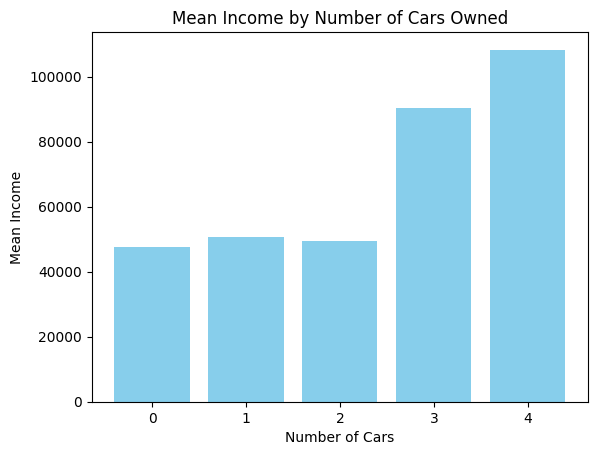

In [45]:



# Calculate mean income grouped by number of cars
income_by_cars = data.groupby("Cars")[" Income "].mean()

# Plotting the bar chart
plt.bar(income_by_cars.index, income_by_cars.values, color='skyblue')
plt.xlabel("Number of Cars")
plt.ylabel("Mean Income")
plt.title("Mean Income by Number of Cars Owned")
plt.show()



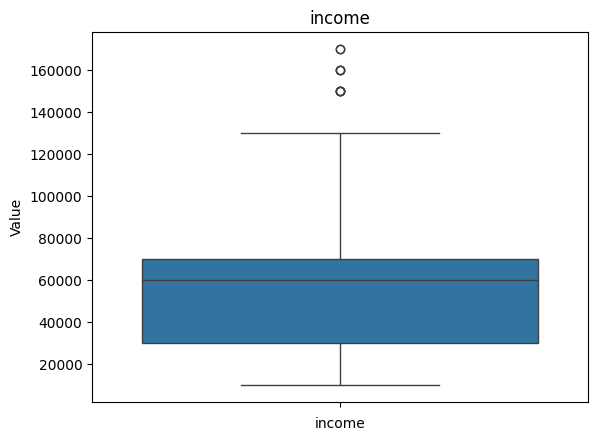

In [46]:
#boxplot for income
sns.boxplot(data=data[" Income "])


plt.title('income')
plt.xlabel('income')
plt.ylabel('Value')


plt.show()

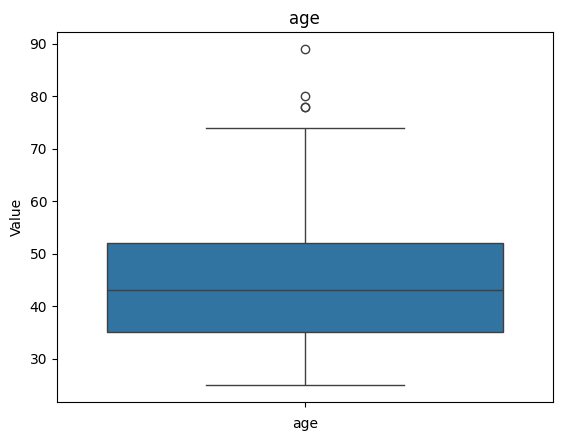

In [47]:
#box plot for age
sns.boxplot(data=data["Age"])


plt.title('age')
plt.xlabel('age')
plt.ylabel('Value')


plt.show()


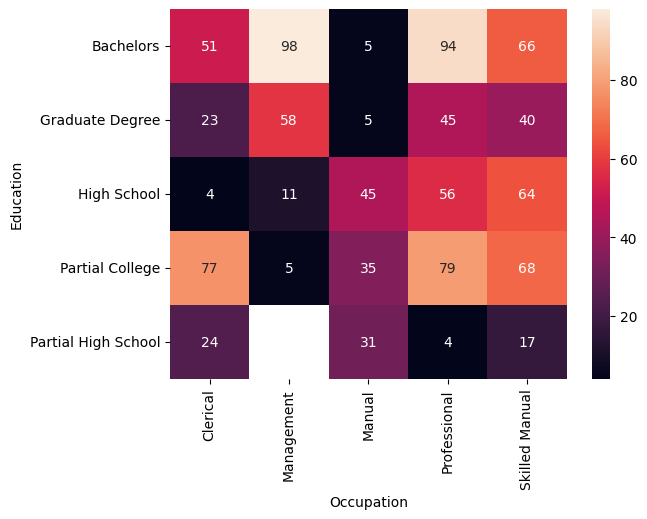

In [48]:
# Create a pivot table for Education level by Occupation
x = pd.pivot_table(index='Education', columns='Occupation', values='ID', aggfunc='count', data=data)

sns.heatmap(x, annot=True)
plt.show()


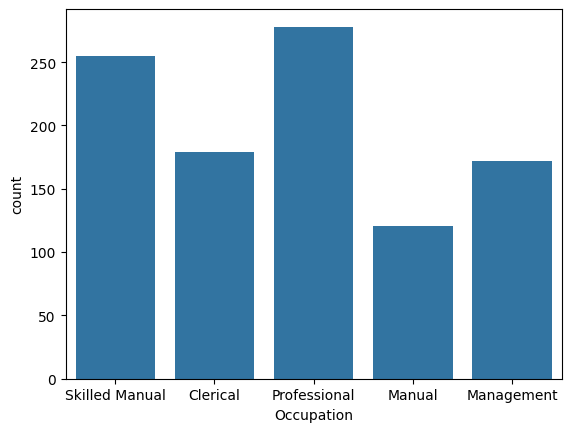

In [49]:
# Plotting the count of each occupation
sns.countplot(x="Occupation", data=data)
plt.show()



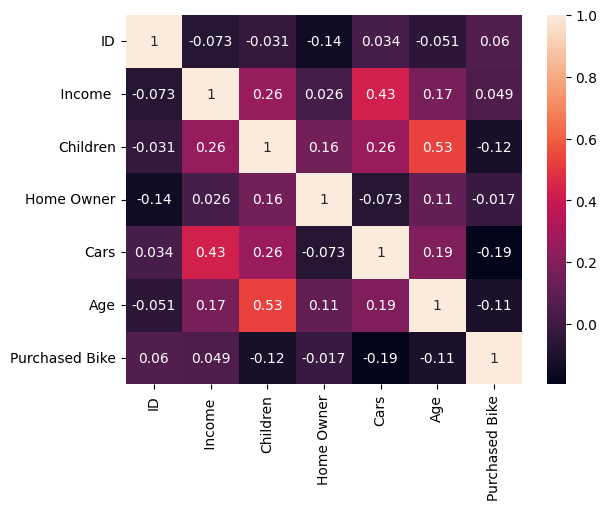

In [50]:
# Create a heatmap for correlation
corr = data.corr(numeric_only=True)

sns.heatmap(corr, annot=True)
plt.show()




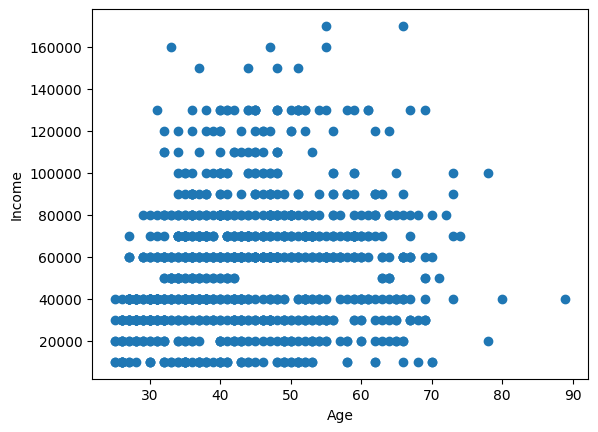

In [51]:
# Plotting a scatter plot of Age with Income
plt.scatter(data["Age"], data[" Income "])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()
